In [19]:
import numpy as np
import pandas as pd

## Q8 - College data set

### (a) & (b) Read data & Using first column as index

In [20]:
college = pd.read_csv("./data/college.csv", index_col=0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (c) Exploring data

In [21]:
# i. Describe the general information of data
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


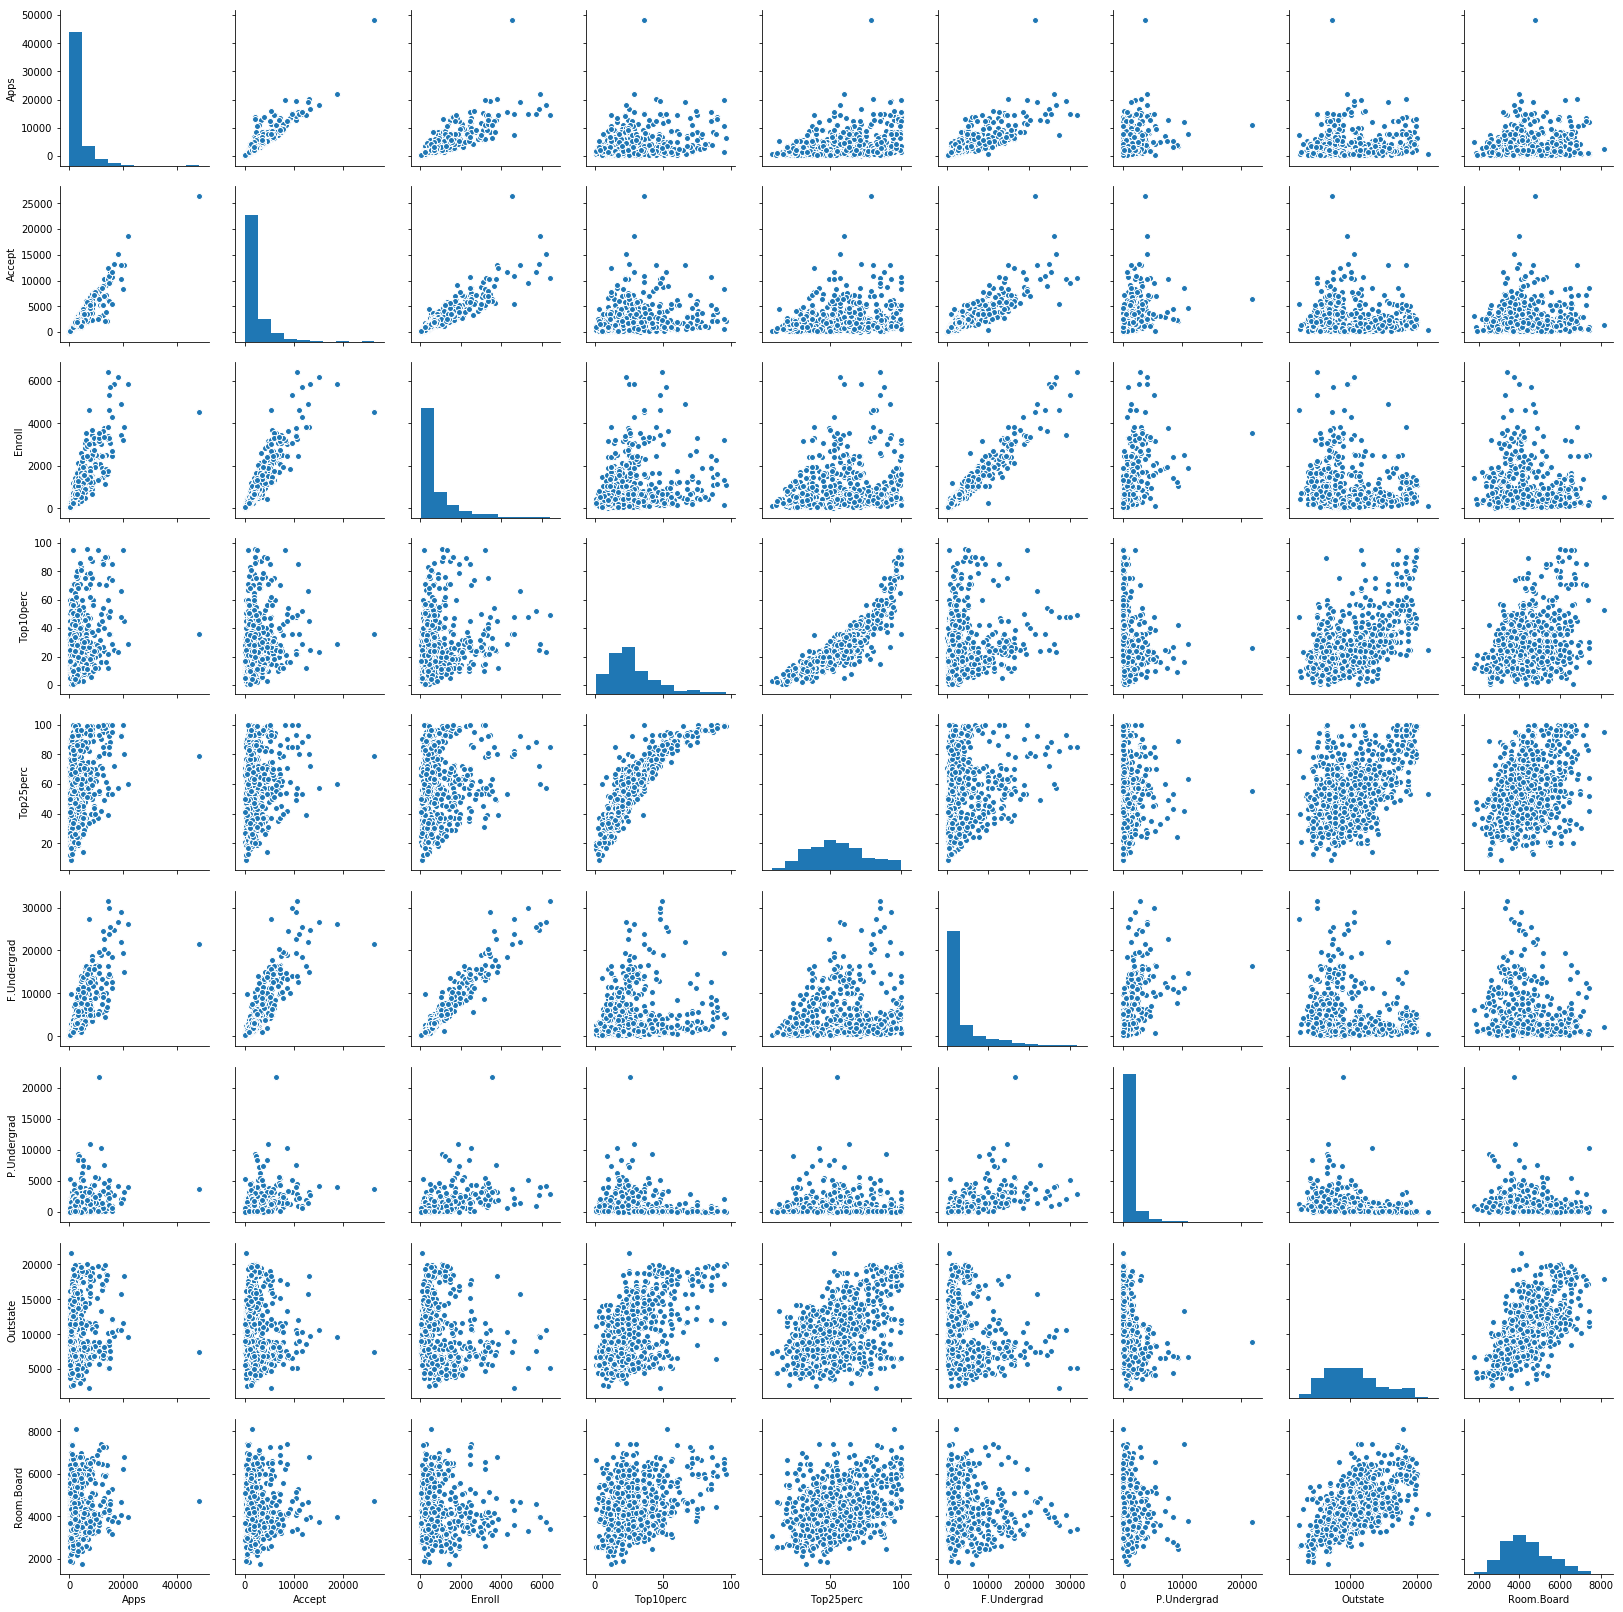

In [22]:
# ii. Plotting first 10 columns of data

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(college.iloc[:,:10])

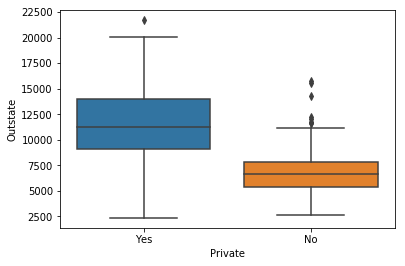

In [23]:
# iii. Outstate vs Private
sns.boxplot('Private', 'Outstate', data=college)

In [24]:
# iv. Categorize an Elite: check that whether or not the proportion of students comming from the top 10% of their 
#     high school classes exceeds 50%

# first, check again the data
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [25]:
college['Elite'] = pd.Categorical(np.where(college['Top10perc'] > 50, 'Yes', 'No'))
college['Elite'].value_counts() # How many elite university there are

No     699
Yes     78
Name: Elite, dtype: int64

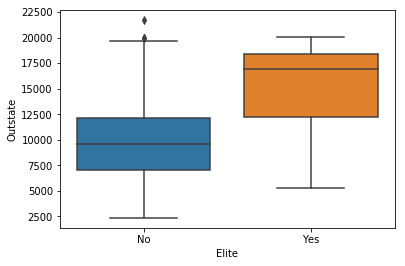

In [26]:
sns.boxplot('Elite', 'Outstate', data=college)

Text(0.5,1,'Percent of faculty with PhDs')

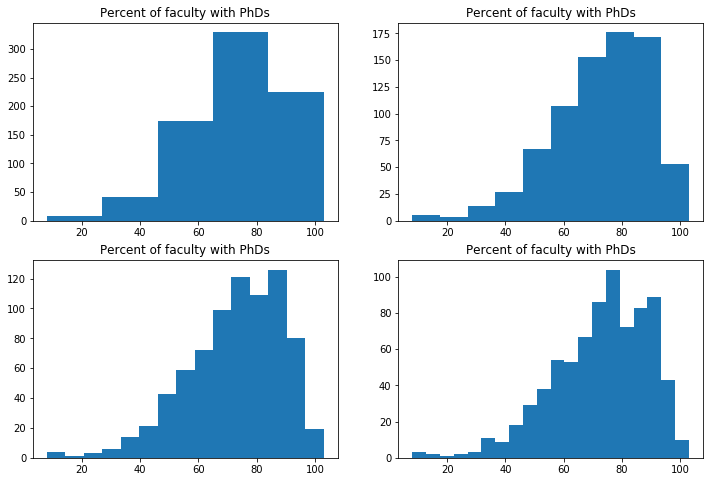

In [31]:
# v. Plot hist of some quantitative variables

fig, ax = plt.subplots(2,2,figsize=(12,8))

ax[0,0].hist(college['PhD'], bins=5)
ax[0,0].set_title('Percent of faculty with PhDs')

ax[0,1].hist(college['PhD'], bins=10)
ax[0,1].set_title('Percent of faculty with PhDs')

ax[1,0].hist(college['PhD'], bins=15)
ax[1,0].set_title('Percent of faculty with PhDs')

ax[1,1].hist(college['PhD'], bins=20)
ax[1,1].set_title('Percent of faculty with PhDs')

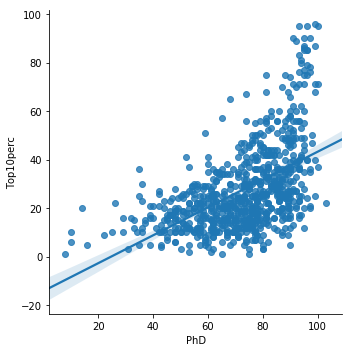

In [34]:
# vi. Number of eleite student vs number of PhDs 

sns.lmplot('PhD', 'Top10perc', data=college)

Clearly to sea that the attactiveness of the number of PhDs in the colleges to the good students

## Q9 - Auto data set





In [35]:
auto = pd.read_csv('./data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


There is no missing values in the data

### (a) Quantitative vs Qualitative

- Quantitative : mpg, cylinders, displacement, horsepower, weight, acceleration
- Qualitative: year, origin, name

### (b) and (c) Range, mean, SD

In [38]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### (d) Removing rows


In [48]:
removed_auto = auto.drop(auto.index[10:86])
removed_auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,24.444860,5.370717,187.174455,2933.183801,15.709034,77.143302,1.598131
std,7.899928,1.653486,99.864568,809.638650,2.706441,3.128202,0.816163
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


### (e) Plots relationship between variables

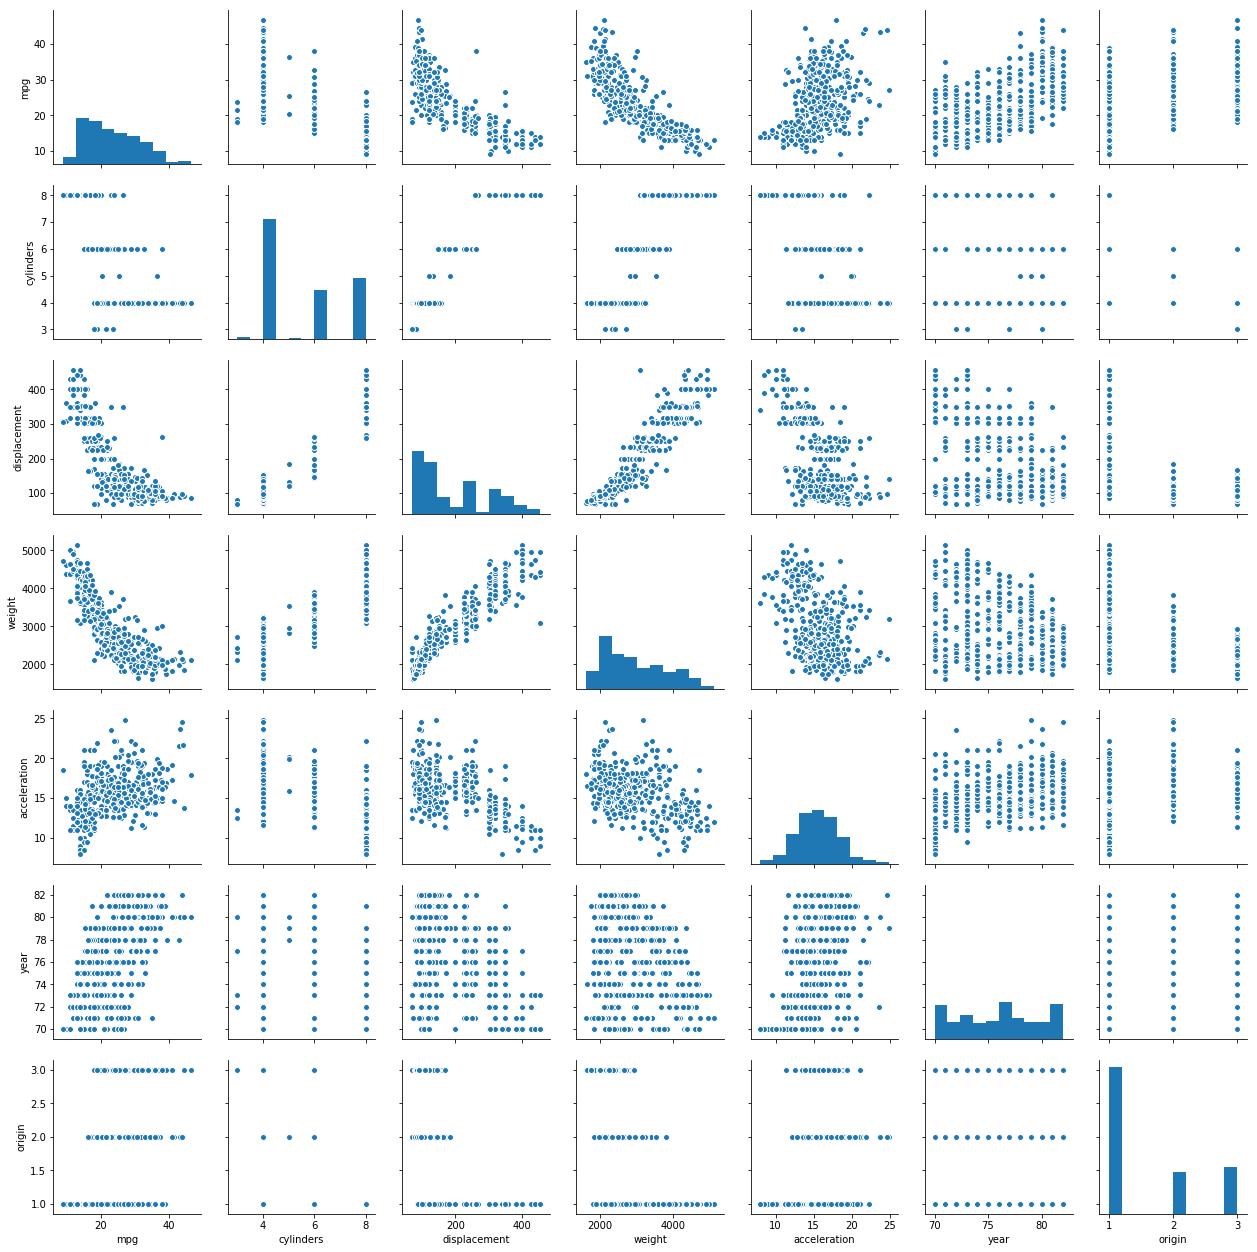

In [49]:
sns.pairplot(auto)

### (e) Predict mpg

Look at the plots line of mpg, there are some variables which are helpful to predict mpg: displacement, weight and acceleration.

## Q10. Boston data set

### (a) Load and take a look


In [50]:
boston = pd.read_csv('./data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [52]:
boston.shape # number of rows and columns

(506, 14)

In [69]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This data frame contains the following columns:

- `crim` per capita crime rate by town.
- `zn` proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus` proportion of non-retail business acres per town.
- `chas` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox` nitrogen oxides concentration (parts per 10 million).
- `rm` average number of rooms per dwelling.
- `age` proportion of owner-occupied units built prior to 1940.
- `dis` weighted mean of distances to five Boston employment centres.
- `rad` index of accessibility to radial highways.
- `tax` full-value property-tax rate per  \$10,000.
- `ptratio` pupil-teacher ratio by town.
- `black` 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- `lstat` lower status of the population (percent).
- `medv` median value of owner-occupied homes in \$1000s.

### (b) Relationship between variables

In [60]:
# sns.pairplot(boston) # too large to make the plot, check the corr first
boston.corr().sort_values('crim', ascending=False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
lstat,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
ptratio,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445


### (c) Predictors are associated with per capita crime rate
From above table, we see that there are some variables have associated with `crim`. They are `rad`, `tax`, `lstat`, `nox`, `indus`. We only plot the relation plots between them with `crim`.

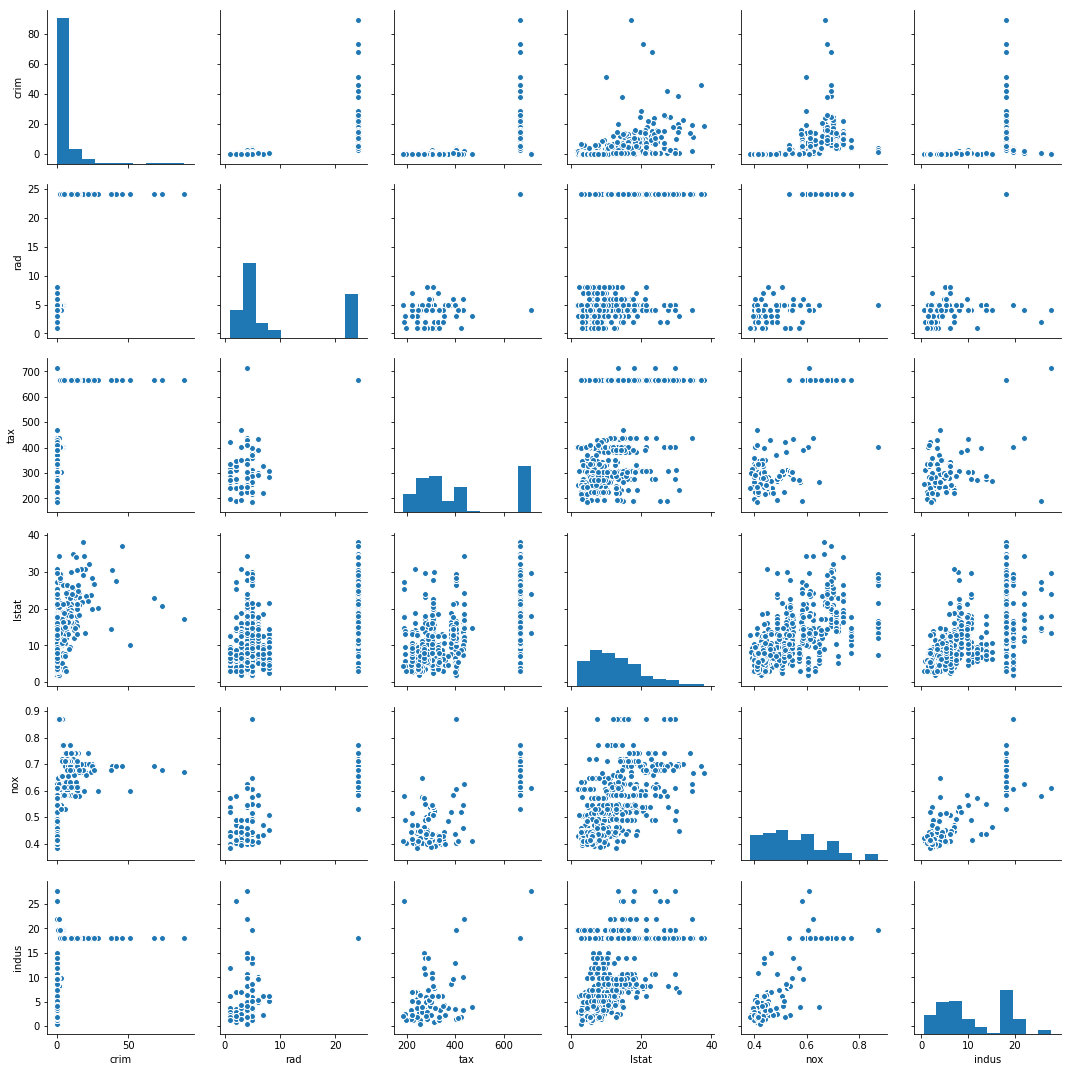

In [68]:
sns.pairplot(boston.loc[:,['crim','rad','tax','lstat','nox','indus']])

(array([ 439.,   44.,   14.,    1.,    3.,    2.,    0.,    1.,    1.,    1.]),
 array([  6.32000000e-03,   8.90330800e+00,   1.78002960e+01,
          2.66972840e+01,   3.55942720e+01,   4.44912600e+01,
          5.33882480e+01,   6.22852360e+01,   7.11822240e+01,
          8.00792120e+01,   8.89762000e+01]),
 <a list of 10 Patch objects>)

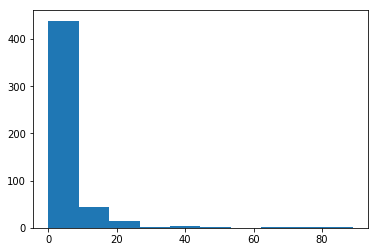

In [92]:
# (d) suburb have particularly high crime rates
plt.hist(boston['crim'])

### (e, f, g, h)

In [70]:
# (e) number of suburbs bound the Charles river
boston['chas'].sum()

35

In [71]:
# (f) The median pupil-teacher ratio among the towns
boston['ptratio'].median()

19.05

In [72]:
# (g) suburb of Boston has lowest median value of owner-occupied homes?
boston['medv'].idxmin()

398

In [74]:
# the values of other predictors for that suburb
boston.iloc[boston['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [84]:
# overall range of those predictors
def range(x):
    return pd.Series(index=['min', 'max'], data=[x.min(), x.max()])
boston.apply(range)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
min,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1,0.871,8.780,100.0,12.1265,24,711,22.0,396.90,37.97,50.0


Compare with the range, we see that the suburb of Boston which has lowest median value of owner-occupied homes also has the values in the end of range in other predictors. It means that its attributes are perhaps the worst in that feature.

In [85]:
# (h) The number of the suburbs average more than 7 rooms per dwelling
(boston['rm']>7).sum()

64

In [86]:
# (h) The number of the suburbs average more than 8 rooms per dwelling
(boston['rm']>8).sum()

13

In [91]:
pd.DataFrame({'More than 8 rooms': boston[boston['rm'] > 8].describe().loc['50%'], 
              '8 or less rooms' : boston[boston['rm'] <= 8].describe().loc['50%']})

,More than 8 rooms,8 or less rooms
crim,0.52014,0.24522
zn,0.00000,0.00000
indus,6.20000,9.69000
chas,0.00000,0.00000
nox,0.50700,0.53800
rm,8.29700,6.18500
age,78.30000,77.30000
dis,2.89440,3.21570
rad,7.00000,5.00000
tax,307.00000,334.00000


The rate of crime and median value of homes are very diffent for the case less and more than 8 rooms.